# Exercise 00: Understanding Convolutions - From First Principles

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shang-vikas/series1-coding-exercises/blob/main/exercises/blog-04/exercise-00.ipynb)

## Setup

In [11]:
# Install required packages using the kernel's Python interpreter
import sys
import subprocess
import importlib

def install_if_missing(package, import_name=None):
    """Install package if it's not already installed."""
    if import_name is None:
        import_name = package

    try:
        importlib.import_module(import_name)
        print(f"✓ {package} is already installed")
    except ImportError:
        print(f"Installing {package}....")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✓ {package} installed successfully")

# Install required packages
install_if_missing("numpy")
install_if_missing("matplotlib")
install_if_missing("scikit-learn", "sklearn")

✓ numpy is already installed
✓ matplotlib is already installed
✓ scikit-learn is already installed


## 🧪 Exercise 1 — Why Flattening Fails

**Goal:** How spatial structure is destroyed.

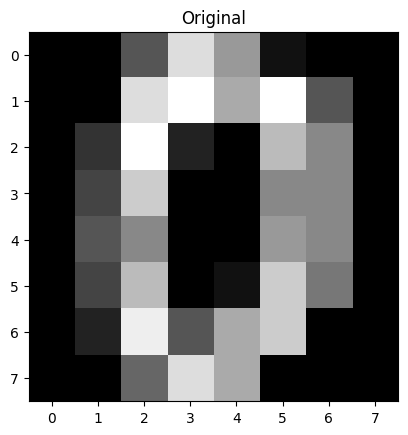

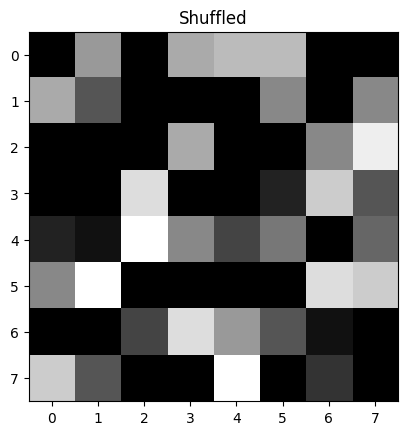

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
image = digits.images[0]

plt.imshow(image, cmap="gray")
plt.title("Original")
plt.show()

# Flatten
flat = image.flatten()

# Shuffle pixels
np.random.shuffle(flat)
shuffled = flat.reshape(8, 8)

plt.imshow(shuffled, cmap="gray")
plt.title("Shuffled")
plt.show()

**what do you see:**

- Same pixel values?
- Completely destroyed meaning?
- Why?

Locality matters

## 🧪 Exercise 2 — Manual Convolution

**Goal:** Implement one 3×3 filter manually.

In [13]:
def simple_conv(image, kernel):
    h, w = image.shape
    k = kernel.shape[0]
    output = np.zeros((h-k+1, w-k+1))

    for i in range(h-k+1):
        for j in range(w-k+1):
            patch = image[i:i+k, j:j+k]
            output[i, j] = np.sum(patch * kernel)

    return output

**Example edge detector:**

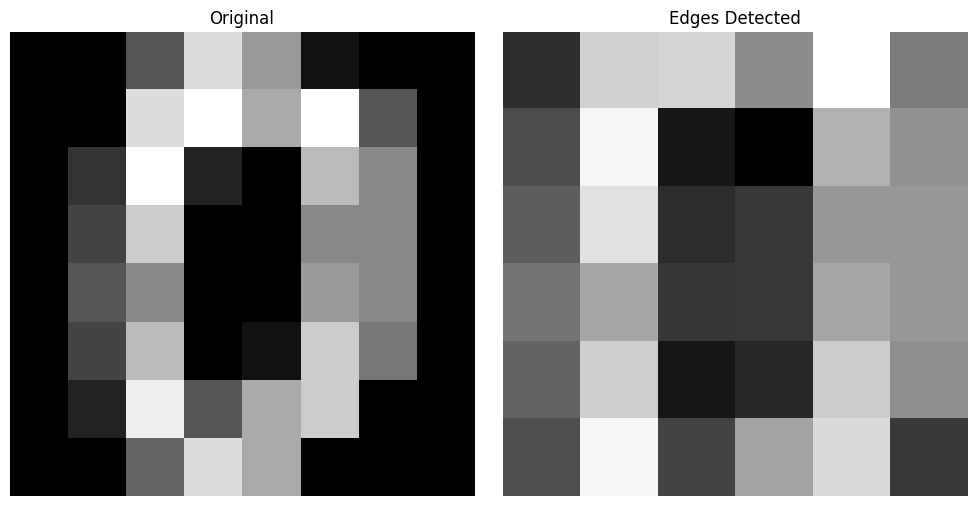

In [14]:
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Apply to real digit image
digits = load_digits()
image = digits.images[0]

# Apply convolution
edges = simple_conv(image, kernel)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(edges, cmap="gray")
axes[1].set_title("Edges Detected")
axes[1].axis('off')

plt.tight_layout()
plt.show()

We can see edges appear.

That's how convolution filters help. OpenCV, a famous library has various manual filters that help in edge detection, facial detection. They all are manual, but with machine learning(neural networks) and data, our model will learn them implicitly.

## 🧪 Exercise 3 — Weight Sharing Demonstration

Use same kernel in two image regions.

See how:

- Detector fires in both places.
- No new weights needed.

This connects to parameter efficiency.

In [19]:
# Demonstrate weight sharing
digits = load_digits()
image = digits.images[0]

# Same kernel applied to different regions
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Apply to top-left region
top_left = image[0:3, 0:3]
result1 = np.sum(top_left * kernel)

# Apply to bottom-right region
bottom_right = image[5:8, 5:8]
result2 = np.sum(bottom_right * kernel)

print(f"Top-left region response: {result1}")
print(f"Bottom-right region response: {result2}")
print(f"\nSame kernel, same weights, different locations!")
print(f"Total parameters: {kernel.size} (shared across entire image)")

Top-left region response: -36.0
Bottom-right region response: -31.0

Same kernel, same weights, different locations!
Total parameters: 9 (shared across entire image)


## 🧪 Exercise 4 — Pooling by Hand

In [20]:
def max_pool(image, size=2):
    h, w = image.shape
    output = np.zeros((h//size, w//size))

    for i in range(0, h, size):
        for j in range(0, w, size):
            patch = image[i:i+size, j:j+size]
            output[i//size, j//size] = np.max(patch)

    return output

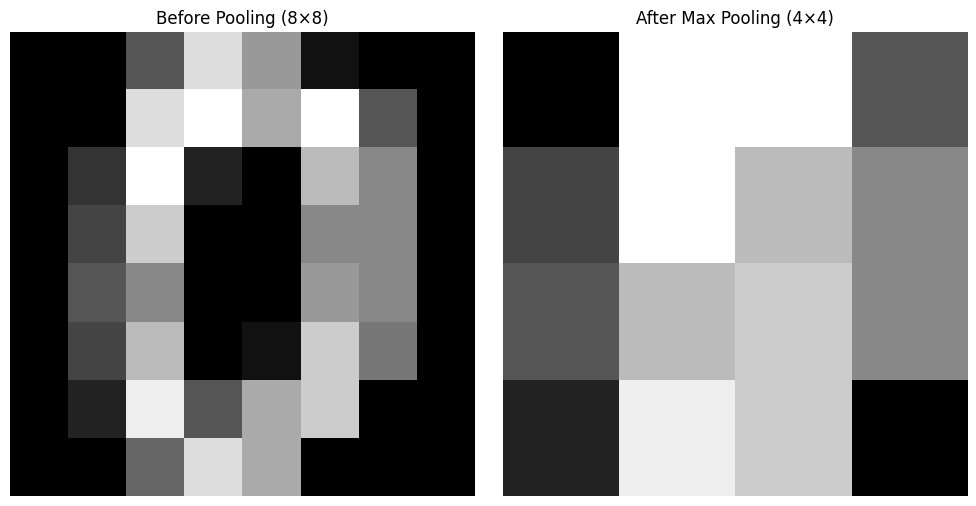

Original size: (8, 8)
Pooled size: (4, 4)
Reduction: 4.0x


In [21]:
# Show before/after pooling
digits = load_digits()
image = digits.images[0]

# Apply max pooling
pooled = max_pool(image, size=2)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Before Pooling (8×8)")
axes[0].axis('off')

axes[1].imshow(pooled, cmap="gray")
axes[1].set_title("After Max Pooling (4×4)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Original size: {image.shape}")
print(f"Pooled size: {pooled.shape}")
print(f"Reduction: {image.size / pooled.size:.1f}x")

**Review and tell:**

- What information disappeared?
- What survived?

## 🧪 Exercise 5 — Compare Parameter Count

In [18]:
# Compute parameter count

# Fully connected (8×8 image → 64 inputs → 32 hidden)
image_size = 8 * 8  # 64 inputs
hidden_size = 32
fc_params = image_size * hidden_size

print("Fully Connected Layer:")
print(f"  Input size: {image_size}")
print(f"  Hidden size: {hidden_size}")
print(f"  Parameters: {image_size} × {hidden_size} = {fc_params}")

# Convolution (3×3 kernel, 1 filter)
kernel_size = 3
num_filters = 1
conv_params = kernel_size * kernel_size * num_filters

print("\nConvolutional Layer:")
print(f"  Kernel size: {kernel_size}×{kernel_size}")
print(f"  Number of filters: {num_filters}")
print(f"  Parameters: {kernel_size} × {kernel_size} × {num_filters} = {conv_params}")

print(f"\nParameter ratio: {fc_params / conv_params:.1f}x more parameters in FC layer")
print(f"\nSame edge detector applied everywhere with only {conv_params} parameters!")

Fully Connected Layer:
  Input size: 64
  Hidden size: 32
  Parameters: 64 × 32 = 2048

Convolutional Layer:
  Kernel size: 3×3
  Number of filters: 1
  Parameters: 3 × 3 × 1 = 9

Parameter ratio: 227.6x more parameters in FC layer

Same edge detector applied everywhere with only 9 parameters!


See the scale difference. Lesser params which are efficient also

This should hit hard and also the reason why convolution is superior where locality matters